# Test run this notebook on GPU:
http://sabre:8951/notebooks/LineageTracing/PrimeEditor_new/Image_Processing/20230830-4T1v21x_segmentation.ipynb


In [1]:
# Basic imports
import os,sys,re
from importlib import reload
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


import torch
print(os.getpid())

3929677


In [3]:
torch.cuda.is_available()

False

In [2]:
# ChromAn ris_availabled imports
sys.path.append(r'/lab/weissman_imaging/puzheng/Softwares/') # parent folder of ChromAn

from ChromAn.src import file_io

from ChromAn.src.file_io import dax_process
from ChromAn.src.file_io import data_organization
from ChromAn.src.visual_tools import interactive

## Data folder

In [4]:
# data folder
data_folder = r'/lab/weissman_imaging/puzheng/PE_LT/20230828-ingel_test_GuHCl-4T1-v21x-0813/Glyoxal_GuHCl_PuWash/'
# scan subfolders
folders, fovs = data_organization.search_fovs_in_folders(data_folder)
# analysis folder
analysis_folder = os.path.join(data_folder, 'Analysis')
if not os.path.exists(analysis_folder):
    os.makedirs(analysis_folder)

- searching in folder: /lab/weissman_imaging/puzheng/PE_LT/20230828-ingel_test_GuHCl-4T1-v21x-0813/Glyoxal_GuHCl_PuWash/
-- 1 folders, 132 fovs detected.


In [9]:
r'/lab/weissman_imaging/puzheng/PE_LT/20230828-ingel_test_GuHCl-4T1-v21x-0813/Glyoxal_GuHCl_PuWash/'.strip('/')

'lab/weissman_imaging/puzheng/PE_LT/20230828-ingel_test_GuHCl-4T1-v21x-0813/Glyoxal_GuHCl_PuWash'

In [6]:
# color usage
color_usage_filename = os.path.join(data_folder, 'Analysis', 'color_usage.csv')
color_usage_df = data_organization.Color_Usage(color_usage_filename)

- load color_usage from file: /lab/weissman_imaging/puzheng/PE_LT/20230828-ingel_test_GuHCl-4T1-v21x-0813/Glyoxal_GuHCl_PuWash/Analysis/color_usage.csv


# Create field of view class

In [9]:
fov_param = {'data_folder': data_folder,
             'save_folder': analysis_folder,
             'experiment_type': 'DNA',
             'num_threads': 32,
             'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210621-Corrections_lumencor_from_60_to_50',
             'shared_parameters':{
                     'single_im_size':[13, 2304, 2304],
                     'distance_zxy': [500, 107, 107],
                     'corr_channels':['748','637','545','488'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':False,
                     'corr_bleed':True,
                     'min_num_seeds':5,
                     'max_num_seeds': 20000,
                     'spot_seeding_th': 1000,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                     'corr_gaussian_highpass':False,
                 }, 
             }

In [7]:
from ChromAn.src import classes
from ChromAn.src.classes import field_of_view
reload(field_of_view)


<module 'ChromAn.src.classes.field_of_view' from '/lab/weissman_imaging/puzheng/Softwares/ChromAn/src/classes/field_of_view.py'>

In [8]:
# 

In [9]:
_fov = field_of_view.Field_of_View(fov_param, _fov_id=1)

NameError: name 'fov_param' is not defined

# Manual

In [10]:
# ChromAn related imports
sys.path.append(r'/lab/weissman_imaging/puzheng/Softwares/') # parent folder of ChromAn

from ChromAn.src import file_io

from ChromAn.src.file_io import dax_process
from ChromAn.src.file_io import data_organization
from ChromAn.src.visual_tools import interactive

In [11]:
_fov_id = 1
_fov_filename = os.path.join(folders[0], fovs[_fov_id])

In [12]:
# load image
daxp = dax_process.DaxProcesser(
    _fov_filename,
    CorrectionFolder=r'\\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\Corrections\20210621-STORM6_lumencor_from_60_to_50' )
daxp._load_image()

Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230828-ingel_test_GuHCl-4T1-v21x-0813/Glyoxal_GuHCl_PuWash/H0M1/Conv_zscan_001.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230828-ingel_test_GuHCl-4T1-v21x-0813/Glyoxal_GuHCl_PuWash/H0M1/Conv_zscan_001_processed.hdf5
-- all used channels: ['748', '637', '477', '405']
-- single image size: [  40 2304 2304]
- Loaded images for channels:['748', '637', '477', '405'] in 1.468s.


In [13]:
spots_list = daxp._fit_3D_spots(fit_channels=['748', '637'], seeding_kwargs={'th_seed':600})

TypeError: DaxProcesser._fit_3D_spots() got an unexpected keyword argument 'seeding_kwargs'

In [16]:
daxp.spots_637 = daxp.spots_637[daxp.spots_637.to_intensities() > 3000]
print(len(daxp.spots_637))

AttributeError: 'DaxProcesser' object has no attribute 'spots_637'

In [17]:
%matplotlib notebook
coord_dict = {
    'coords':list(np.concatenate([daxp.spots_748.to_coords(), 
                             daxp.spots_637.to_coords()])),
    'class_ids': list(0 * np.ones(len(daxp.spots_748))) + list(1 * np.ones(len(daxp.spots_637)))
}

interactive.imshow_mark_3d([daxp.im_748, daxp.im_637, daxp.im_405], use_dict=coord_dict)

AttributeError: 'DaxProcesser' object has no attribute 'spots_748'

In [ ]:
# for each coord, pick local dapi signal:


In [32]:
from scipy.spatial.distance import cdist

dists =  1 / cdist(daxp.spots_748.to_coords(), daxp.spots_637.to_coords())

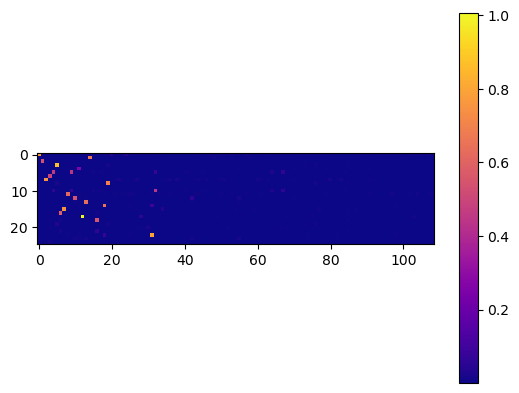

In [35]:
plt.figure()
plt.imshow(dists, 
           #vmin=0, vmax=10, 
           cmap='plasma')
plt.colorbar()
plt.show()

In [36]:
allowed_drift_th = 3
x_coords, y_coords = np.where(dists > 1/allowed_drift_th)
kept_spots_748, kept_spots_637 = daxp.spots_748[x_coords], daxp.spots_637[y_coords]

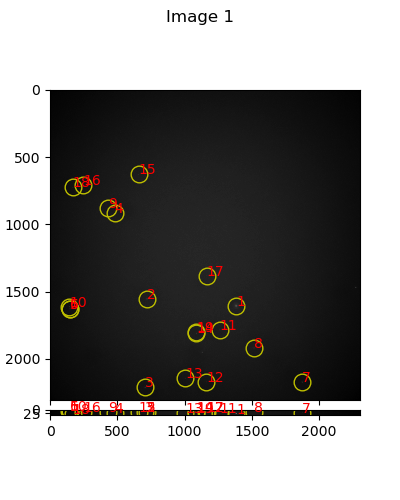

In [37]:
%matplotlib notebook
coord_dict = {
    'coords':list(np.concatenate([kept_spots_748.to_coords(), 
                             kept_spots_637.to_coords()])),
    'class_ids': list(0 * np.ones(len(kept_spots_748))) + list(1 * np.ones(len(kept_spots_637)))
}
interactive.imshow_mark_3d([daxp.im_748, daxp.im_637, daxp.im_405], use_dict=coord_dict)

# run quick segmentation

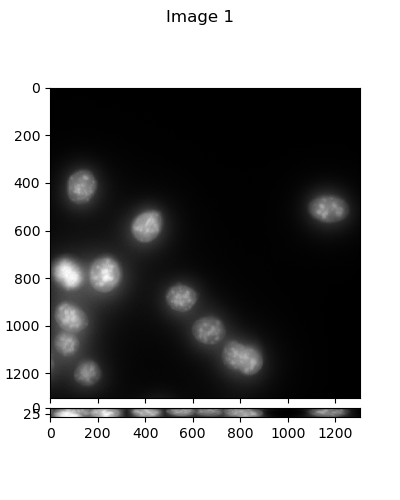

In [44]:
interactive.imshow_mark_3d([])

In [18]:
# Cellpose 
from cellpose import models
import time

In [19]:
import cellpose

In [20]:
import cv2
test_dapi_im = np.array([cv2.resize(_ly, (1152,1152) ) 
                         for _ly in daxp.im_405])


In [21]:
# Create cellpose model
print(f"- run Cellpose segmentation", end=' ')
_cellpose_start = time.time()
torch.cuda.empty_cache() # empty cache to create new model
seg_model = models.CellposeModel(gpu=True, model_type='nuclei')
# Run cellpose prediction
labels3d, _, _ = seg_model.eval(np.stack([test_dapi_im,test_dapi_im], axis=3), 
                                batch_size=30, 
                                ##anisotropy=250/108,
                                anisotropy=500/214,
                                cellprob_threshold=0, 
                                channels=[0,0], 
                                diameter=65, 
                                min_size=4000,
                                do_3D=True,
                                )
print(f"in {time.time()-_cellpose_start:.3f}s.")

- run Cellpose segmentation in 159.781s.


In [22]:
# resize segmentation label back
corr_labels3d = np.array([cv2.resize(_ly, daxp.im_405.shape[-2:], 
                                interpolation=cv2.INTER_NEAREST_EXACT) 
                     for _ly in labels3d])

In [96]:
labels3d.shape

(40, 1152, 1152)

In [26]:
interactive.imshow_mark_3d([daxp.im_405, corr_labels3d])

NameError: name 'corr_labels3d' is not defined

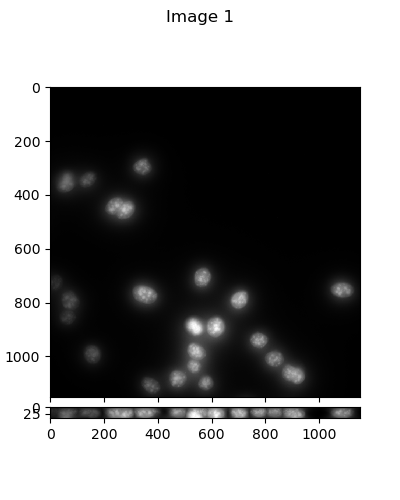

In [99]:
interactive.imshow_mark_3d([test_dapi_im, labels3d])

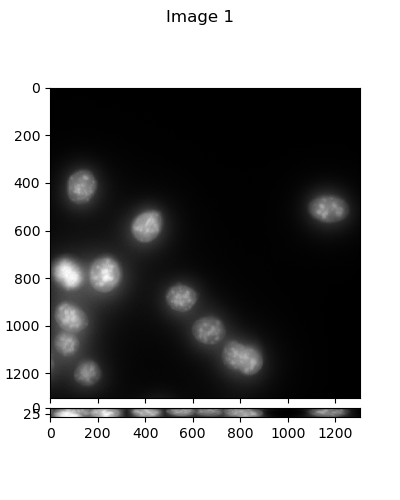

In [54]:
interactive.imshow_mark_3d([daxp.im_405[:,1000:,1000:], labels3d])

In [ ]:
%matplotlib notebook
f = plt.figure(dpi=125)
interactive.imshow_mark_3d(
    [getattr(daxp, f"im_{_ch}") for _ch in daxp.channels], 
    fig=f,
    image_names=daxp.channels, 
    min_max_default=[0,20000],
    )
f.show()

In [ ]:
# Job 1: preprocess images, save
# Job 2: spot fitting
# Job 3: segmentation, submit to GPU node
